# 1."Identificacion de problema"

Se desean identificar patrones climaticos de precipitacion y otras variables en el Valle de Aburrá (Medellín y municipios aledaños), ¿como esta informacion puede ser utilizada para optimiar riesgos climaticos?, ¿optimizar dicisiones agricolas?, ¿mejorar la planeacion urbana?, etc

# 2. "Set de datos"

La informacion recolectada se encuentra en un archivos Excel(datos_climatologicos_medellin_enriquesido), con 16252 filas y 19 columnas.

Las columnas son:

| **Columna**           | **Tipo de dato** | **Descripción**                                                            |
| --------------------- | ---------------- | -------------------------------------------------------------------------- |
| `fecha`               | `datetime64`     | Fecha del registro diario.                                                 |
| `año`                 | `int`          | Año correspondiente a la fecha.                                            |
| `mes`                 | `object`         | Mes en formato de texto (ej: "enero").                                     |
| `ciudad`              | `object`         | Nombre del municipio (ej: Medellín, Envigado).                             |
| `zona`                | `object`         | Clasificación urbana, rural o mixta.                                       |
| `precipitacion_mm`    | `float`        | Cantidad de precipitación diaria en milímetros.                            |
| `temp_max`            | `float`        | Temperatura máxima diaria (°C).                                            |
| `temp_min`            | `float`        | Temperatura mínima diaria (°C).                                            |
| `humedad`             | `float`        | Humedad relativa promedio del día (%).                                     |
| `viento_10m`          | `float`        | Velocidad del viento a 10 metros de altura (m/s).                          |
| `presion`             | `float`        | Presión atmosférica (hPa o mb).                                            |
| `temp_media`          | `float`        | Promedio entre la temperatura máxima y mínima diaria (°C).                 |
| `rango_termico`       | `float`        | Diferencia entre temperatura máxima y mínima (°C).                         |
| `indice_calor_aprox`  | `float`        | Estimación del índice de calor percibido (°C).                             |
| `evento_lluvia`       | `bool`           | Indicador binario: `True` si hubo lluvia (> 0 mm), `False` si no.          |
| `lluvia_intensa`      | `bool`           | Indicador binario: `True` si la lluvia fue fuerte (según umbral definido). |
| `humedad_alta`        | `bool`           | `True` si la humedad es alta (según umbral definido).                      |
| `estacion`            | `object`         | Clasificación estacional (e.g., seca\_corta, lluviosa).                    |
| `condicion_climatica` | `object`         | Descripción general del clima ese día (ej: "lluvioso").                    |





# 3 Mirada al dataset


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [52]:
from google.colab import drive
drive.mount('/content/drive')

ruta = '/content/drive/MyDrive/Proyecto Final/Datos en Crudo/datos_climaticos_medellin_enriquecido.xlsx'
data = pd.read_excel(ruta)

Mounted at /content/drive


In [53]:
print(data.shape)

(16252, 19)


In [54]:
data.head()

,fecha,año,mes,ciudad,zona,precipitacion_mm,temp_max,temp_min,humedad,viento_10m,presion,temp_media,rango_termico,indice_calor_aprox,evento_lluvia,lluvia_intensa,humedad_alta,estacion,condicion_climatica
0,1981-01-01,1981,enero,Medellín,urbana,2.07,20.61,12.99,90.66,0.81,81.56,16.800,7.62,42.1508,True,False,True,seca_corta,lluvioso
1,1981-01-02,1981,enero,Envigado,mixta,0.93,20.31,12.70,89.39,0.96,81.58,16.505,7.61,41.3317,True,False,True,seca_corta,lluvioso
2,1981-01-03,1981,enero,Envigado,mixta,4.53,22.58,12.12,87.52,1.02,81.49,17.350,10.46,41.5176,True,False,True,seca_corta,lluvioso
3,1981-01-04,1981,enero,Itagüí,urbana,1.72,22.73,12.54,83.95,0.80,81.50,17.635,10.19,40.7785,True,False,False,seca_corta,lluvioso
4,1981-01-05,1981,enero,Itagüí,urbana,4.52,21.95,13.34,87.02,0.56,81.53,17.645,8.61,41.9696,True,False,True,seca_corta,lluvioso


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                16252 non-null  object 
 1   año                  16252 non-null  int64  
 2   mes                  16252 non-null  object 
 3   ciudad               16252 non-null  object 
 4   zona                 16252 non-null  object 
 5   precipitacion_mm     16252 non-null  float64
 6   temp_max             16252 non-null  float64
 7   temp_min             16252 non-null  float64
 8   humedad              16252 non-null  float64
 9   viento_10m           16252 non-null  float64
 10  presion              16252 non-null  float64
 11  temp_media           16252 non-null  float64
 12  rango_termico        16252 non-null  float64
 13  indice_calor_aprox   16252 non-null  float64
 14  evento_lluvia        16252 non-null  bool   
 15  lluvia_intensa       16252 non-null 

# 4. "Limpieza"

Realizaremos el proceso de limpieza teniendo en cuentra las situaciones más comunes:
1.   Datos faltantes en algunas celdas.
2.   Columnas irrelevantes (que no responden al problema que queremos resolver).
3.   Registros (filas) repetidas.
4.   Valores extremos (outliers) en el caso de las variables numpericas se deben analizar en datalle pues no necesariamente la solución es eliminarlos..
5.   Errores tipográficos en el caso de las variables categóricas.

Al final de este proceso de limpieza deberíamos tener un set de datos íntegro, listo para la fase de Análisis Exploratorio.

#4.1 Datos faltantes

En este caso no tenemos datos faltantes

In [56]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16252 entries, 0 to 16251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha                16252 non-null  object 
 1   año                  16252 non-null  int64  
 2   mes                  16252 non-null  object 
 3   ciudad               16252 non-null  object 
 4   zona                 16252 non-null  object 
 5   precipitacion_mm     16252 non-null  float64
 6   temp_max             16252 non-null  float64
 7   temp_min             16252 non-null  float64
 8   humedad              16252 non-null  float64
 9   viento_10m           16252 non-null  float64
 10  presion              16252 non-null  float64
 11  temp_media           16252 non-null  float64
 12  rango_termico        16252 non-null  float64
 13  indice_calor_aprox   16252 non-null  float64
 14  evento_lluvia        16252 non-null  bool   
 15  lluvia_intensa       16252 non-null 

In [59]:
columnas_con_faltantes = [
    "precipitacion_mm", "temp_max", "temp_min", "humedad",
    "viento_10m", "presion", "temp_media", "indice_calor_aprox"
]

data[columnas_con_faltantes] = data[columnas_con_faltantes].replace(-999, np.nan)
print(data[columnas_con_faltantes].isnull().sum())


precipitacion_mm      0
temp_max              0
temp_min              0
humedad               0
viento_10m            0
presion               0
temp_media            0
indice_calor_aprox    0
dtype: int64


In [58]:
data = data.iloc[:-3]

#4.2 Columnas irrelevantes

Dada una mirada al dataset, podemos identificar algunas columnas redundantes como:


1.   (Fecha) con (mes y año), teniendo una fecha precisa no resulta muy necesario tener el mes y el año.
2.   (Lluvia_intensa) no aporta valor al dataset, solo cuenta con un valor.

por ahora no hay mas columnas irrelevantes.




In [61]:
data = data.drop('lluvia_intensa', axis=1)

In [72]:
data.shape

(16249, 18)

In [41]:
cols_cat = ['fecha','año','mes','ciudad','zona','precipitacion_mm',
            'temp_max','temp_min','humedad','viento_10m','presion','temp_media','rango_termico',
            'indice_calor_aprox','evento_lluvia','humedad_alta','estacion','condicion_climatica']

for col in cols_cat:
  print(f'Columna {col}: {data[col].nunique()} subniveles')

Columna fecha: 16249 subniveles
Columna año: 45 subniveles
Columna mes: 12 subniveles
Columna ciudad: 5 subniveles
Columna zona: 4 subniveles
Columna precipitacion_mm: 2539 subniveles
Columna temp_max: 975 subniveles
Columna temp_min: 609 subniveles
Columna humedad: 2084 subniveles
Columna viento_10m: 129 subniveles
Columna presion: 74 subniveles
Columna temp_media: 1155 subniveles
Columna rango_termico: 2210 subniveles
Columna indice_calor_aprox: 14065 subniveles
Columna evento_lluvia: 2 subniveles
Columna humedad_alta: 2 subniveles
Columna estacion: 3 subniveles
Columna condicion_climatica: 4 subniveles


In [11]:
data.describe()

,año,precipitacion_mm,temp_max,temp_min,humedad,viento_10m,presion,temp_media,rango_termico,indice_calor_aprox
count,16252.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16249.000000,16252.000000,16252.000000
mean,2002.751600,7.404536,21.490014,14.543942,88.717141,0.726594,81.588981,18.016978,6.944789,42.660206
std,12.846783,6.714063,1.671093,0.915674,4.146108,0.187837,0.095795,0.990733,1.828688,9.257493
min,1981.000000,0.000000,15.250000,10.600000,66.880000,0.220000,81.180000,13.355000,0.000000,-633.370000
25%,1992.000000,2.260000,20.300000,13.990000,86.390000,0.590000,81.520000,17.355000,5.590000,42.161850
50%,2003.000000,5.860000,21.580000,14.600000,89.040000,0.710000,81.590000,18.015000,6.970000,42.926500
75%,2014.000000,10.740000,22.630000,15.150000,91.590000,0.840000,81.660000,18.640000,8.220000,43.572100
max,2025.000000,132.060000,29.120000,18.060000,98.390000,1.640000,81.930000,22.785000,14.140000,46.402600


#4.3 Filas repetidas
 En este caso en particular, no hay filas repetidas, dado que cada fecha es distinta.

In [45]:
print(f'Tamaño de set antes de eliminar las filas repetidas: {data.shape}')
data.drop_duplicates(inplace = True)
print(f'Tamaño del set despues de eliminar las filas repetidas: {data.shape}')

Tamaño de set antes de eliminar las filas repetidas: (16249, 18)
Tamaño del set despues de eliminar las filas repetidas: (16249, 18)


#4.4 outliers en las variables numericas

En este caso en particular almenos por ahora, los outliers son un reflejo de la reaidad, por el momento se conservaran.

Eliminaremos los datos imposibles.


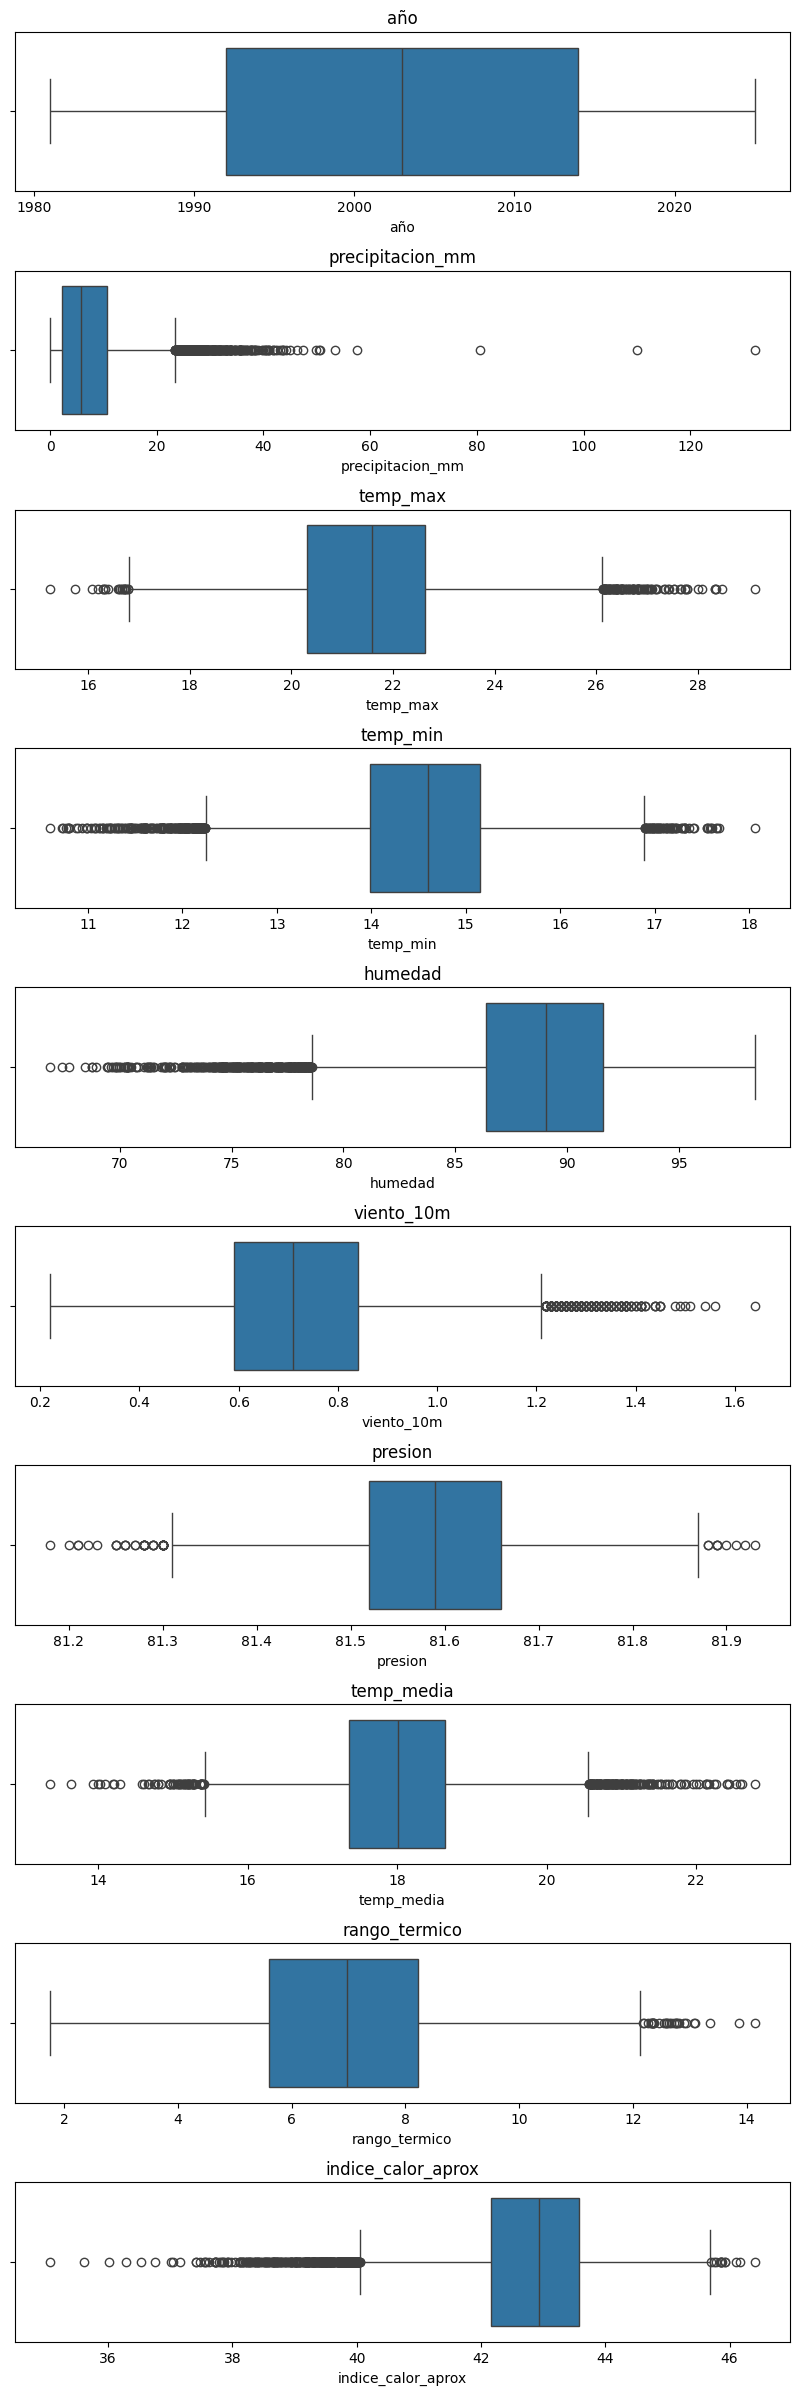

In [69]:
cols_num = ['año','precipitacion_mm', 'temp_max','temp_min','humedad',
            'viento_10m','presion','temp_media','rango_termico','indice_calor_aprox']


fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(len(cols_num), 30))
fig.subplots_adjust(hspace=0.5)

if len(cols_num) == 1:
    ax = [ax]

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# Observaiones

"precipitacion_mm" hay valores que superan los 100 mm, pero es un valor posible.

"indice_de_calor_aprox" hay un valor por debajo de -100, un indice de calor por debajo de -50 es muy improbable.

"rango_termico" hay un valor en 0, pero es un valor posible.

In [70]:
print(f'Tamaño del set antes de eliminar registro de datos: {data.shape}')
data = data[data['indice_calor_aprox'] > -50]
print(f'Tamaño del set despues de eliminar registro de datos: {data.shape}')

Tamaño del set antes de eliminar registro de datos: (16249, 18)
Tamaño del set despues de eliminar registro de datos: (16249, 18)


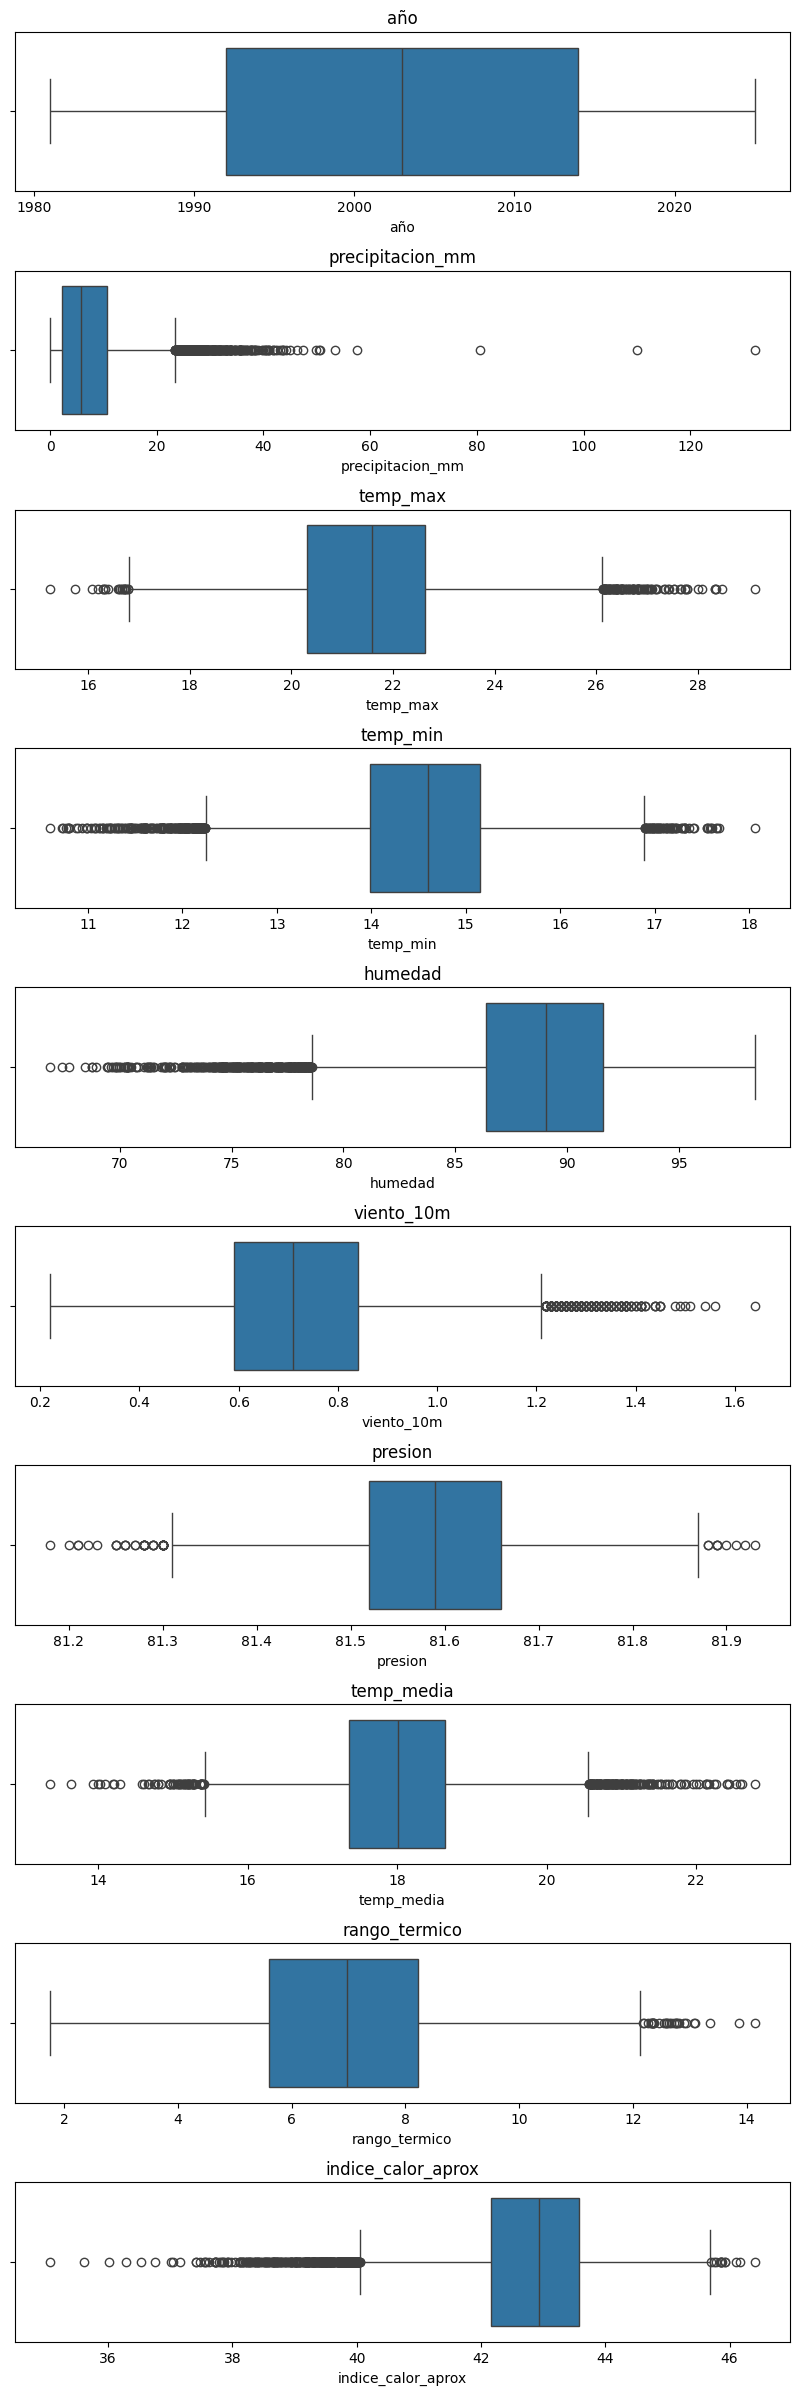

In [68]:
cols_num = ['año','precipitacion_mm', 'temp_max','temp_min','humedad',
            'viento_10m','presion','temp_media','rango_termico','indice_calor_aprox']


fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(len(cols_num), 30))
fig.subplots_adjust(hspace=0.5)

if len(cols_num) == 1:
    ax = [ax]

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

# 4.5 Errores tipograficos en variables categoricas

/tmp/ipython-input-67-1374686440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
/tmp/ipython-input-67-1374686440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
/tmp/ipython-input-67-1374686440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
/tmp/ipython-input-67-1374686440.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)
/tmp/ipython-input-67-1374686440.py:15: UserWarning: set_ticklabels() sh

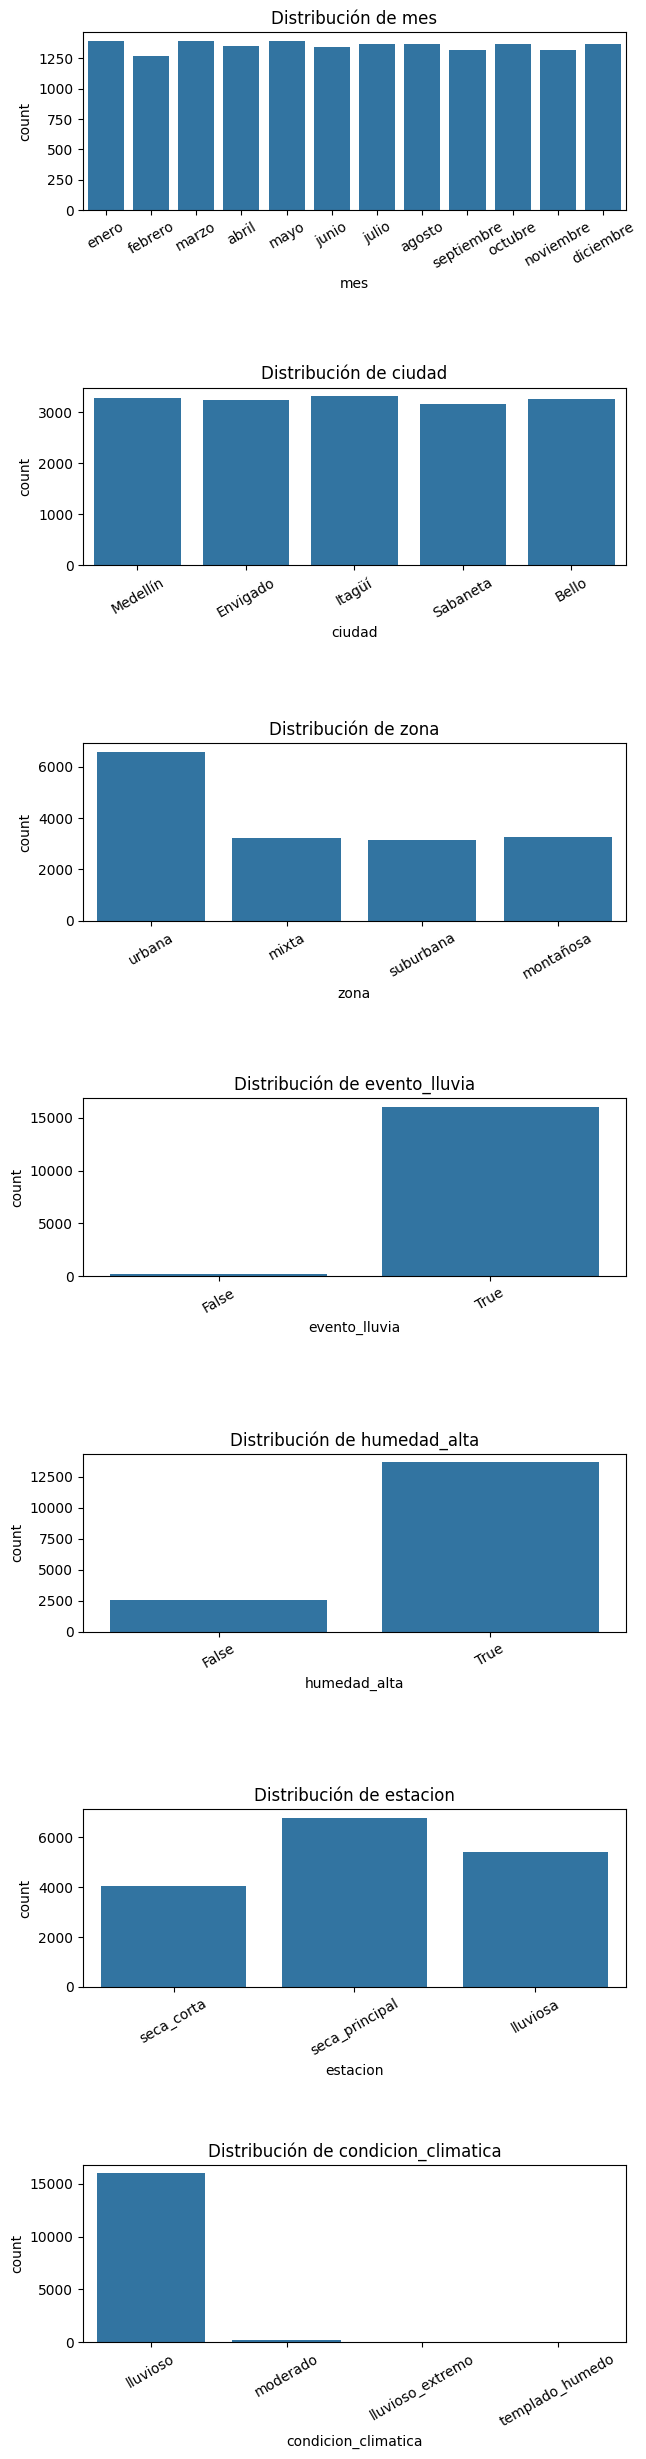

In [67]:
# Graficar los sub-niveles de cada variable categorica

cols_cat = [
    'mes', 'ciudad', 'zona', 'evento_lluvia',
    'humedad_alta', 'estacion', 'condicion_climatica'
]


fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(len(cols_cat), 30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(cols_cat):
    sns.countplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(f'Distribución de {col}', fontsize=12)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 30)


**! Listo, ya hemos realizado la limpieza de nuestros set de datos ¡**

- originalmene tenia 16,252 filas y 19 columnas
- quedo con 16,249 filas y 18 columnas

El dataset quedo con 3 filas menos y listo para el analisis de datos

In [74]:
ruta = "/content/drive/MyDrive/Proyecto Final/Datos en Crudo/datos_climaticos_medellin_enriquecido_limpio.xlsx"
data.to_excel(ruta, index=False)